# Car Price Prediction

This dataset includes used vehicles' specifications such as model, year, engine as well as their prices. We will estimate the prices of used cars with using these features. It will be Supervised Learning as the price feature is given. In addition, since our estimation is price value which is real-valued, we will have solved the Regression problem.


In our case, we will first preprocess the fields of the dataset and then feature selection and then build a simple linear regression model with an evaluation process. Finally, we will develop our model using different algorithms.
***

## 1. Downloading Dataset
First step, as you guess, is downloading the dataset. 

The dataset can be fetched with Kaggle CLI by using below command.

##### kaggle datasets download -d CooperUnion/cardataset

or you can also download the dataset from the Kaggle site with the link below:

https://www.kaggle.com/CooperUnion/cardataset

Let's move reading the dataset:
***

## 2. Reading and exploring the Data

To read and analyze the dataset we need to import some libraries.

In [16]:
import numpy as np
import pandas
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

To read csv files, common action is to use `read_csv` function of the pandas library. The `read_csv` function returns `pandas.core.frame.DataFrame` object. We need to assign it to a variable which is in this case the `df`.

In [17]:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv('../data/data.csv', na_values=missing_values)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Let's check the number of rows and columns in the data with **shape** function of the _DataFrame_ object.

In [18]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
df.shape

(11914, 16)

According to this result, we have **11914** rows and **16** columns of data.
Now, let's look at the first five rows of our _DataFrame_ with `head()` function.

Remember; _samples_ are in rows, _features_ are in columns. \
In _features_, our dependent column is **MSRP** which we want to predict, and the rest of the columns are named as predictors. \
If we look at the output of the DataFrame's `shape` function again, we see that we have **11914** _samples_ and **16** _features_.

Check the type of data stored in each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

`describe` function provides statistics of each column. These types of functions provide general information about the data.

In [62]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## 3. Preprocessing the Data

At first glance at the dataset, it is noticed that the column names and their contents are not in the correct format, especially contents that may be categorical variables such as the `Driven_Wheels` column's content.

First, let's normalize the column names by _replacing all spaces with underscores and all letters with lowercase letters_.

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

After the change, there is now more convenient format for the column names.

In [9]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

> **Note**: *The columns which are `object` type are assumed as `categorical data`. Beyond changing the form of categorical data, to increase our model's accuracy,  the categorical data needs to be preprocessed to be input to our model . We will work on this later.*


<p> Also, to uniform the content of the columns which are object type, we implement the same form changes to them:

Our rule is, again, ___replace all spaces with underscore and lowercase all letters.___

</p>

**To do that**:

**1-)** select only columns with string values which are `object` data types.

In [10]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


**2-)** make the appropriate changes to the content of the string columns according to the above rule.

In [11]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

With these changes, you will see that we will handle the categorical variables easily.

Let's have a look at the first five rows again.

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 4. Quick look to categorical variables
What categorical values the `Make` attribute has? Let's look at the **value_counts** function to find categories and their counts.

In [13]:
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

and another column, `Transmission Type`.

In [14]:
df.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

Have you seen "unknown" type which its count is 19, but when I sum null values...

In [15]:
df.transmission_type.isna().sum()

0

...its count is 0.  "unknown" typed records are also missing values.

You can continue to check `object` type columns like above. This is important to determine categorical attributes. We will deal with them later.

## 5. Target Variable Analysis

One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This is called `distribution` of the variable.

The most common way to represent the distribution is plotting by using `histogram` which is a graph that shows the `frequency` of each value.

Let's plot the **MSRP**(*Manufacture's Suggested Retail Price*) feature which is our target variable, **y**, the value which we want to predict.

<AxesSubplot: xlabel='msrp', ylabel='Count'>

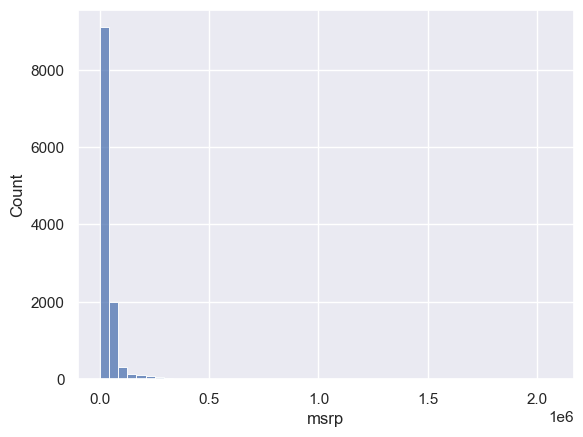

In [71]:
sns.histplot(df.msrp, bins=50)

Notice that the distribution of prices is asymmetric; it has very long tail that extends farther to the left than to the right. That means, there are many cars with low prices on the left side of the graph.

Let's have a closer look by zooming left side of the graph by looking at values below $100,000

<AxesSubplot: xlabel='msrp', ylabel='Count'>

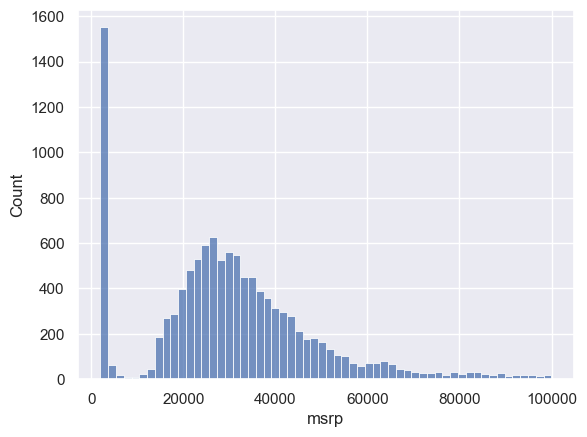

In [72]:
sns.histplot(df.msrp[df.msrp < 100000])

We also notice a lot of cars that cost $1,000. Such distribution can greatly confuse the model, and may make a bit harder for some Machine Learning algorithms to detect patterns.

One way to solve this problem is **log transformation**. If we apply the log function to the prices, it removes the undesired effect.

In [73]:
log_price = np.log1p(df.msrp)

Let's have a look at the histogram of the **MSRP** feature which is our target variable after log transformation.

<AxesSubplot: xlabel='msrp', ylabel='Count'>

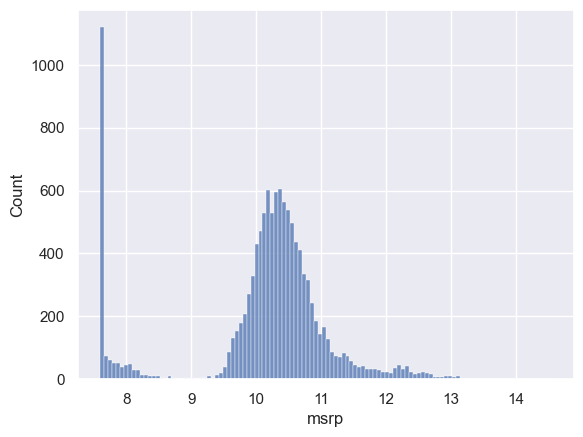

In [74]:
sns.histplot(log_price)

The graph shows that we have still a large peak in lower prices which means the distribution is not normal but the transformation removes the long tail, and we have the bell-shaped curve which is what we want.

## 6. Feature Selection

Statistical (Pearson's correlation matrix) veya ML feature selection yöntemleriyle yapılabilir.


### 6.1. Feature selection with Correlations

In [48]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

# TO DO df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
engine_hp,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
engine_cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
number_of_doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway_mpg,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city_mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
msrp,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [49]:
corr_matrix["msrp"].sort_values(ascending=False)

msrp                1.000000
engine_hp           0.662008
engine_cylinders    0.531312
year                0.227590
popularity         -0.048476
number_of_doors    -0.126635
city_mpg           -0.157676
highway_mpg        -0.160043
Name: msrp, dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, that means that there is a strong positive correlation; for example, the `msrp` tends to go up when the `engine_hp` goes up. When the coefficient is close to -1, that means, there is a strong negative correlation; for example, there is a negative correlation between `engine_cylinder` and both `highway_mpg` and `city_mpg`, means; as the number of cylinder increases, the miles per gallon will decrease. Finally, if coefficient close to 0 mean that there is no linear correlation.

I put a zoomed example of `msrp` and `engine_hp` below. You can see the positive correlation on the graph.

<AxesSubplot: xlabel='msrp', ylabel='engine_hp'>

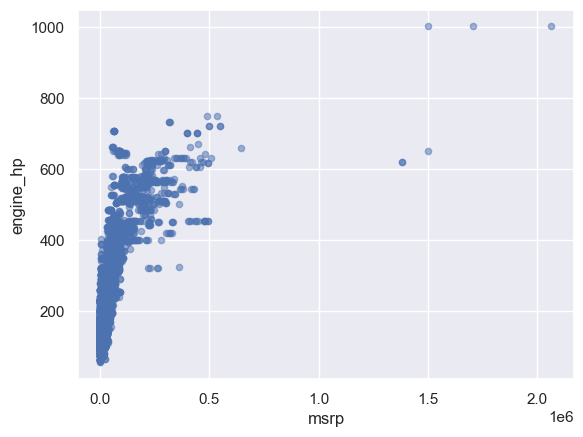

In [50]:
df.plot(kind="scatter", x="msrp", y="engine_hp", alpha=0.5)

Also, we can see the correlation matrix as a heatmap to distinguish correlations between features. This can tell you which variables are related to one another.

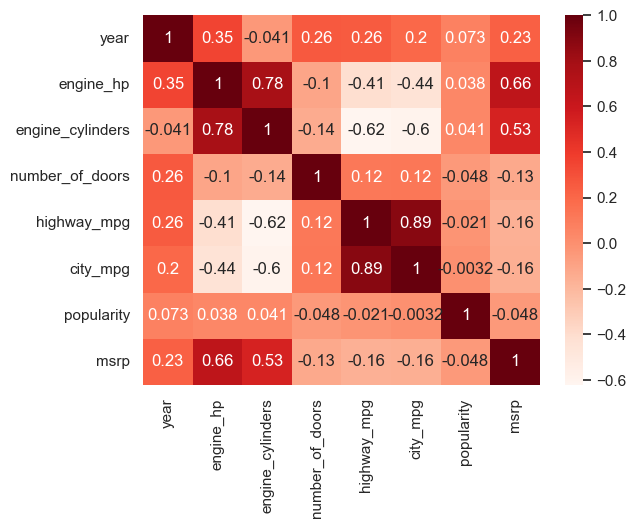

In [51]:
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot: >

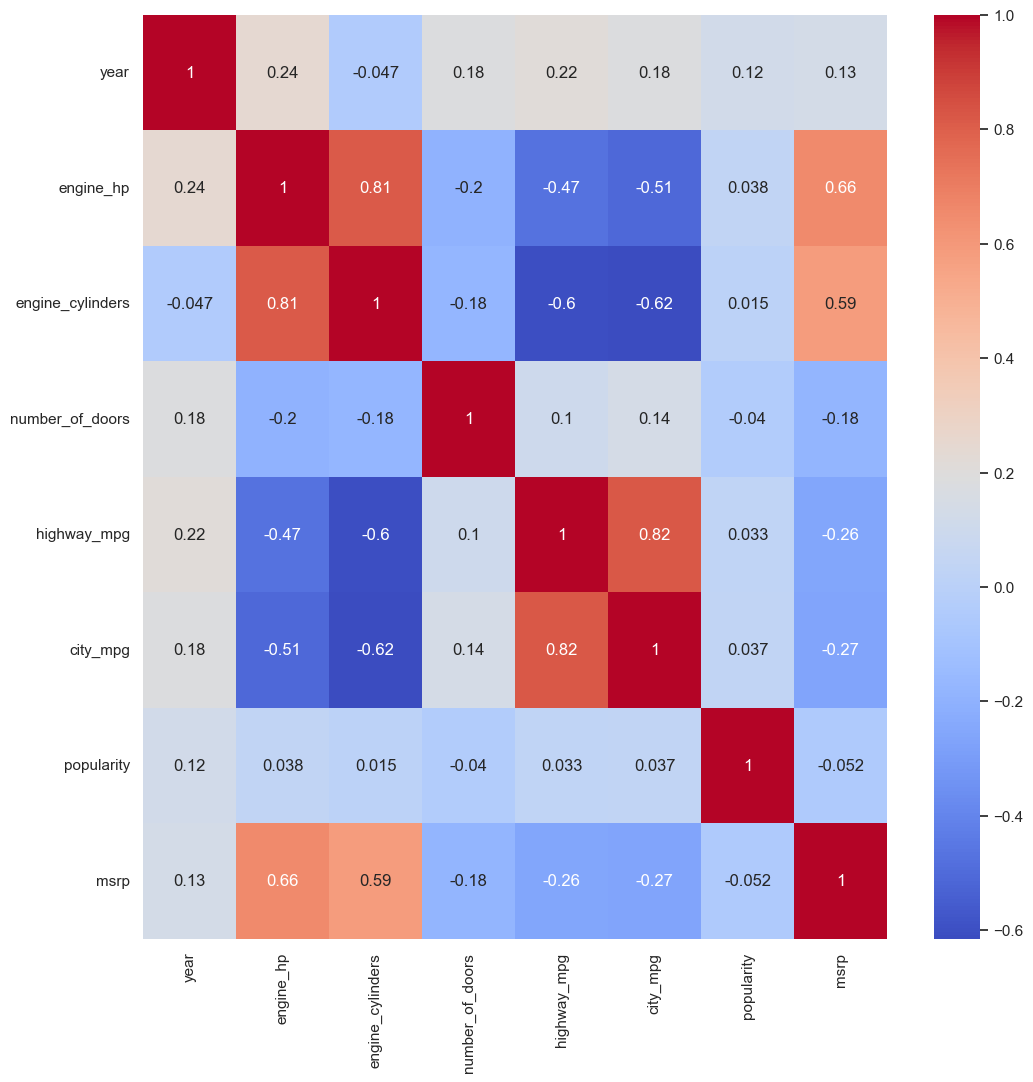

In [52]:
plt.figure(figsize=(12,12))
bla = df.dropna()
sns.heatmap(bla.corr(), annot=True, cmap="coolwarm")

### We can choose values that are above a certain ratio. Here you can see the features with a correlation of more than 50%.

In [53]:
# Correlation with output variable
cor_target = abs(corr_matrix["msrp"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.2]
print(best_features)

year                0.227590
engine_hp           0.662008
engine_cylinders    0.531312
msrp                1.000000
Name: msrp, dtype: float64


### 6.2 Feature selection with Machine Learning Methods
There are many methods to select features in Machine Learning and I will follow some of the methods.
First, let's extract X and y.

In [54]:
df_orig = df.copy()

#Dropping missing values
columns_with_missing_val = [column for column in df_orig.columns
                if df_orig[column].isnull().any()]
df_orig.drop(columns_with_missing_val, axis=1, inplace=True)

# dropping categorical values
df_orig = df_orig.select_dtypes(exclude="object")
X = df_orig.drop(['msrp'], axis=1)
y = np.log1p(df.msrp)

### Let's try Recursive feature elimination with cross-validation to select features.

In [29]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=42,
              n_estimators=100, oob_score=True)

rf_mod.fit(X, y)

# Print
print(X.columns)
print(rf_mod.feature_importances_)


Index(['year', 'highway_mpg', 'city_mpg', 'popularity'], dtype='object')
[0.93738388 0.         0.06261612 0.        ]


In [30]:
# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(X.columns)
print(xt_mod.feature_importances_)

Index(['year', 'highway_mpg', 'city_mpg', 'popularity'], dtype='object')
[0.77033327 0.05635949 0.10234042 0.07096682]


## 7. Finding the best approaches for both missing values and categorical data
First of all, our main target is to find the **best model** for the data. For this, we need to do a series of trials for both missing values and categorical data, and then we need to compare the scores we get from the trials and use the best approaches we have found when creating our model. For finding the best scores, we will use **RMSE(Root Mean Squared Error)** for the performance measure.
#### The approaches we will follow for missing values:
   **7.1 Approach 1:** Drop columns with missing values
   **7.2 Approach 2:** Imputation
   **7.3 Approach 3:** An Extension technique for Imputation
#### The approaches we will follow for categorical data:
   **7.4 Approach 1:** Drop Categorical Variables
   **7.5 Approach 2:** Ordinal encoding
   **7.6 Approach 3:** One-Hot Encoding

Let's start with missing values part.
First, let's divide the dataset into train and validation. For this, we will use sklearn's **train_test_split** function.

Buna zorunlu değiliz, metodlar şeklinde de işlemlerimizi yapabiliriz ancak tanımlama ve açıklama açısından daha rahat olacağına inandığım belli bir yapı üzerinden devam etmek istiyorum.

In [ ]:

from pandas import DataFrame, Series
from dataclasses import dataclass


@dataclass
class MissingValHandler:
    d_frame : DataFrame
    X_train: DataFrame = None
    X_valid: DataFrame = None
    y_train: Series = None
    y_valid: Series = None

    def drop_columns(self):
        pass

    def make_imputation(self):
        pass

    def imputation_extension(self):
        pass

@dataclass
class CustomDataHandler:
    d_frame : DataFrame
    X_train: DataFrame = None
    X_valid: DataFrame = None
    y_train: Series = None
    y_valid: Series = None

    def drop_categorical(self):
        pass

    def ordinal_encoding(self):
        pass

    def one_hot_encoding(self):
        pass


In [75]:
from sklearn.model_selection import train_test_split

# First, we need to copy the original data
X_orig = df.drop(['msrp'], axis=1)
y_orig = df.msrp

# We need to separate the target variable from the dataset.
y = np.log1p(y_orig)

# Now let's create a new DataFrame named `used_car_predictors` without MSRP column and create the variable `X`, excluding the categorical estimators, which are of type object.
used_car_predictors = X_orig # df.drop(['msrp'], axis=1)
X = used_car_predictors.select_dtypes(exclude="object")

# Let's check the latest variables; We have variable `y` of type Series which is our target variable and variable `X` of type DataFrame which contains numeric values.
# Below line of code splits our dataset as train and validation.
X_train_missing, X_valid_missing, y_train_missing, y_valid_missing = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
# Note that, we set the random_state parameter to generate the same shuffled indices. It assures the same train and test split will occur for different users.

Let's define a function to measure quality of each approach. We will measure by using **RandomForestRegressor** which is an ensemble learning method for regression by generating a large number of decision trees during the training phase and **Root Mean Squared Error(RMSE)** by calculating the square root of the mean of the square of all errors between the model predictions and actual values.

RMSE formulation is below:

$RMSE = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m}(g(x_{i})-y_{i})^{2}}$

Below function will return scores for each approach and we will select the lowest one.

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    """
    The method we will follow:
        * instantiate
        * fit training
        * predict test data
        * score your model on the test
    """

    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return np.sqrt(mean_squared_error(y_valid, preds))

## Checking for Missing Values

Before getting into the approaches, let me show you missing values summary.

In [77]:
X_train_missing.isnull().sum()

year                 0
engine_hp           58
engine_cylinders    24
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [79]:
X_train_missing.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
count,9531.000000,9473.000000,9507.000000,9525.00000,9531.000000,9531.000000,9531.000000
mean,2010.374672,249.562652,5.630693,3.43853,26.668450,19.762145,1545.236806
std,7.589653,109.933046,1.789065,0.88035,9.092519,9.176809,1437.213887
min,1990.000000,62.000000,0.000000,2.00000,12.000000,8.000000,2.000000
25%,2007.000000,170.000000,4.000000,2.00000,22.000000,16.000000,549.000000
50%,2015.000000,225.000000,6.000000,4.00000,26.000000,18.000000,1385.000000
75%,2016.000000,300.000000,6.000000,4.00000,30.000000,22.000000,2009.000000
max,2017.000000,1001.000000,16.000000,4.00000,354.000000,137.000000,5657.000000


In [83]:
X_train_missing.engine_cylinders[X_train_missing.engine_cylinders == 0]

5792    0.0
9869    0.0
9868    0.0
6935    0.0
8375    0.0
6392    0.0
5790    0.0
9850    0.0
6389    0.0
6933    0.0
6928    0.0
6390    0.0
6934    0.0
539     0.0
5793    0.0
6931    0.0
4798    0.0
6391    0.0
9870    0.0
6386    0.0
6394    0.0
6923    0.0
6938    0.0
9872    0.0
9851    0.0
6387    0.0
6393    0.0
4785    0.0
1680    0.0
6925    0.0
4705    0.0
6936    0.0
9854    0.0
8374    0.0
5791    0.0
9852    0.0
4789    0.0
540     0.0
9871    0.0
6385    0.0
9853    0.0
1682    0.0
6932    0.0
1681    0.0
6388    0.0
6927    0.0
6930    0.0
6922    0.0
6926    0.0
6921    0.0
Name: engine_cylinders, dtype: float64

In [56]:
# Shape of training data (num_rows, num_columns)
print(X_train_missing.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train_missing.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

NameError: name 'X_train_missing' is not defined

The first thing we see is that MSRP — our target variable — does not have any missing
values. This result is good, because otherwise, such records won’t be useful to us: we
always need to know the target value of an observation to use it for training the model.

Let's dive in to the approaches for handling missing values;

### Approach 1: Drop columns with missing values

First we need to get column names with missing values.

In [24]:
cols_with_missing = [col for col in X_train_missing.columns
                    if X_train_missing[col].isnull().any()]
cols_with_missing

['engine_hp', 'engine_cylinders', 'number_of_doors']

Since we are working with both training and validation sets, we will drop columns with missing values from both DataFrames.

In [29]:
reduced_X_train = X_train_missing.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid_missing.drop(cols_with_missing, axis=1)

print("RMSE from Approach 1 (Drop columns with missing values:)")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train_missing, y_valid_missing))

RMSE from Approach 1 (Drop columns with missing values:)
0.1575510051740507


Our score with **dropping columns with missing values** approach is 0.10890942126255983.
Let's jump to the second approach.

### Approach 2:  Imputation

Next, we use `SimpleImputer` to replace missing values with the mean value along each column.

In [30]:
from sklearn.impute import SimpleImputer

# Make copy to avoid changing original data
X_train_imputation = X_train_missing.copy()
X_valid_imputation = X_valid_missing.copy()

# Imputation
my_imputer = SimpleImputer(strategy='mean',)
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train_imputation))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid_imputation))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train_missing.columns
imputed_X_valid.columns = X_valid_missing.columns

print("RMSE from Approach 2 (Imputation:)")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train_missing, y_valid_missing))

RMSE from Approach 2 (Imputation:)
0.11737426386091374


We see that Approach 2 has lower _MAE_ than **Approach 1**, so **Approach 2** performed better on this dataset.

### Approach 3: An Extension to Imputation
Next, we impute the missing values, while also keeping track of which values were imputed.

In [31]:
# Make copy to avoid changing original data
X_train_plus = X_train_missing.copy()
X_valid_plus = X_valid_missing.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    print(col)
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
    
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus), columns=X_train_plus.columns)
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus), columns=X_valid_plus.columns)

#imputed_X_train_plus.columns = X_train_plus.columns
# imputed_X_valid_plus.columns = X_valid_plus.columns

print("RMSE from Approach 3 (An Extension to Imputation:)")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train_missing, y_valid_missing))

engine_hp
engine_cylinders
number_of_doors
RMSE from Approach 3 (An Extension to Imputation:)
0.1177572258969438


As we can see, **Approach 3** performed slightly worse than **Approach 2**.

In conclusion, imputing missing values (in **Approach 2** and **Approach 3**) yielded better results, relative to when we simply dropped columns with missing values (in **Approach 1**).

## Categorical Variables

We have, again, 3 approaches; Drop Categorical Variables, Ordinal Encoding and One-Hot Encoding.

Bu üç yaklaşıma başlamadan önce, verinin ön hazırlığı önerilen şekilde hazırlayıp bu üç yöntemi deneyeceğiz. Sonrasında da daha basit bir yolu deneyerek karşılaştırma yapacağız.

Before starting, we will apply preprocessing and observe scores with the recommended way which is briefly concatanating low cardinality columns with numerical columns. Low cardinality means, categorical columns with less number of unique values. We will choose the number of unique values less than 10 for each categorical columns.

Let's do the preprocessing:

In [ ]:
# First, we need to copy the original data
X = X_orig.copy()

# We need to separate the target variable from the dataset.
y = np.log1p(y_orig)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
"""
y = df.msrp # np.log1p(df.msrp)
X = df.drop(['msrp'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
"""

"""
# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()]

# print(cols_with_missing)

X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 20 and
                       X_train_full[cname].dtype == "object"]

# low_cardinality_cols_1 = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
"""

#-----------------------------------
# """

# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()]


low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and
                      X_train_full[cname].dtype == "object"]


# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


Let's examine these three topics one by one.

A **categorical variable** takes only a limited number of values.

You can find the list of categorical variables below.

In [ ]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

 ### Approach 1: Drop Categorical Variables
 
 The easiest approach is to simply remove from the dataset. 
 We drop the `object` columns from our dataset with using `select_dtypes()` method.

In [ ]:
# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

print(label_X_train.columns)

# We're dropping the categorical variables
drop_X_train = label_X_train.select_dtypes(exclude=['object'])
drop_X_valid = label_X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

## Approach 2: Ordinal encoding

Scikit-learn has a `OrdinalEncoder` class that can be used to get ordinal encodings. We loop over the categorical variables and apply the ordinal encoder separately to each column.

#### With low cardinality

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[low_cardinality_cols] = ordinal_encoder.fit_transform(X_train[low_cardinality_cols])
label_X_valid[low_cardinality_cols] = ordinal_encoder.transform(X_valid[low_cardinality_cols])

print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

### Approach 3 (One-Hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid = X_valid.drop(low_cardinality_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

Bu da demek oluyor ki, biz to replace missing values with the mean value along each column  ve Kategorik verilerin handle edilmesinde de One-Hot Encoding kullanacağız.

Aşağıda yapısal olarak daha düzenli görünen bir Pipeline kullanalım


### PIPELINE

In [ ]:
print(numerical_cols)
print(low_cardinality_cols)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='mean')),
     ('std_scaler', StandardScaler())
]) 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, low_cardinality_cols)
    ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1300, max_leaf_nodes = 700, random_state=0)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

In [ ]:
# Preprocessing pf training data, fit model
my_pipeline.fit(X_train, y_train)

In [ ]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

In [ ]:
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

In [ ]:
preds

In [ ]:
sns.histplot(preds, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)

In [ ]:
X_train.columns

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(X_train)
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_valid)

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['make','year', 'engine_hp', 'transmission_type', 'market_category', 'vehicle_size', 'vehicle_style', 'msrp']

scatter_matrix(df[attributes], figsize=(12, 8), s=150)

In [ ]:
"""
X_train_numerical = X_train_full.select_dtypes(exclude=['object'])
X_valid_numerical = X_train_full.select_dtypes(exclude=['object'])


X_train_categorical = X_train_full.select_dtypes(exclude=["float64", "int64"])
X_valid_categorical = X_train_full.select_dtypes(exclude=["float64", "int64"])


# SIMPLE IMPUTER
my_imputer = SimpleImputer(strategy='mean')
imputed_X_train_numerical = pd.DataFrame(my_imputer.fit_transform(X_train_numerical))
imputed_X_valid_numerical = pd.DataFrame(my_imputer.transform(X_valid_numerical))

imputed_X_train_numerical.fillna(999, inplace=True)
imputed_X_valid_numerical.fillna(999, inplace=True)

imputed_X_train = imputed_X_train_numerical + X_train_categorical
imputed_X_valid = imputed_X_valid_numerical + X_valid_categorical


# Imputation removed column names; put them back
imputed_X_train.columns = X_train_full.columns
imputed_X_valid.columns = X_valid_full.columns

# X_train.fillna(X_train.median(), inplace=True)
# X_valid.fillna(X_valid.median(), inplace=True)

# X_train = X_train.reset_index()
# X_valid = X_valid.reset_index()
"""

In [ ]:
# Make copy to avoid changing original data
# X_train_a1 = X_train.copy()
# X_valid_a1 = X_valid.copy()

#X_train_a1 = imputed_X_train.copy()
#X_valid_a1 = imputed_X_valid.copy()

X_train_a1 = reduced_X_train.copy()
X_valid_a1 = reduced_X_valid.copy()



#X_train_a1.fillna(999, inplace=True)
#X_valid_a1.fillna(999, inplace=True)

drop_X_train = X_train_a1.select_dtypes(exclude=['object'])
drop_X_valid = X_valid_a1.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

In [ ]:
np.any(np.isnan(X_train))

In [ ]:
np.any(np.isnan(X_valid_a1))

In [ ]:
"""
2) Ordinal Encoding
 
     This approach assumes an ordering of the categories. 
     For example, "red" is 1, "green" is 2, and "blue" is 3.
 
 3) One-Hot Encoding
 
     One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.
"""

### Baseline solution

To be able to use it, we need to have some data: a matrix $X$ and a vector with the target variable $y$. We have already prepared the $y$, but we still don't have the $X$: what we have right noe is a data frame, not a matrix. So we need to extract some features from our dataset to create this matrix X.

In the previous example, we used only three features. This time, we include a couple more features and use the following columns:
* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg
* popularity

Let's select the features from the data frame and write them to a new variable, df_num:

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def mse(self, y_test, preds):
        return np.mean((y_test - preds)**2)


In [ ]:
y = np.log1p(df.msrp)
used_car_predictors = df.drop(['msrp'], axis=1)
X = used_car_predictors.select_dtypes(exclude="object")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predictions = linear_regression.predict(X_valid)

mse = linear_regression.mse(y_test=y_valid, preds=predictions)
print(mse)

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

The dataset has missing values,so we need to do something because the linear regression model cannot deal with missing values automatically.

The simplest possible approach is to fill the missing values with zeros. We can use the $fillna$ method from Pandas:

In [ ]:
df_num = df_num.fillna(0)

This method may not be the best way to deal with missing values, but often, it's good enough. If we set the missing feature value to zero, the respective feature is simply ignored.

**NOTE:** An alternative option is to replace the missing values with the average values. For some variables, for example, the number of cylinders, the value of zero doesn't make much sense: a car cannot have zero cylinders. However, this will make our code more complex and won't have a significant impact on the results. That's why we follow a simpler approach and replace missing values with zeros.

In our case, we have five features, so the formula is:

$g(X_{i})=w_{0} + x_{i1}w_{1} + x_{i2}w_{2} + x_{i3}w_{3} + x_{i4}w_{4} + x_{i5}w_{5}$

Now we need to convert this DataFrame to a NumPy array. The easiest way to do is to use its $values$ property:

In [ ]:
X_train = df_num.values

X_train is a matrix -- a two-dimensional NumPy array. We can use a input to our linear_regression function.

In [ ]:
w_0, w = train_linear_regression(X_train, y_train) 

We have just trained the first model! Now we can apply it to the training data to see how well it predicts:

In [ ]:
y_pred = w_0 + X_train.dot(w)

To see how good the predictions are, we can use $histplot$ -- a function from $Seaborn$ for plotting histograms that we used previously -- to plot the predicted values and compare them with the actual prices:

In [ ]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

We can see from the plot that the distribution of values we predicted looks quite different from the actual values. This result may indicate that the model is not powerful enough to capture the distribution of the target variable. This shouldn't be a suprise to us: the model we used is quite basic and includes only five very simple features.

### RMSE: Evaluating model quality

Looking at plots and comparing the distributions of the actual target variable with the predictions is a good way to evaluate quality, but we cannot do this every time we change something in the model. Instead, we need to use a metric that quantifies the quality of the model. We can use many metrics to evaluate how well a regression model behaves.
The most commonly used one is __root mean squared error__ --- RMSE for short.

RMSE tells us how large the errors are that our model makes. Its computed with the following formula:

$RMSE = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m}(g(x_{i})-y_{i})^{2}}$

Let's try to understand the equition:

$(g(x_{i})-y_{i})^{2}$

This is the difference between the prediction we make for the observation and actual target value for that observation. Then we use square of the difference, which gives a lot more weight to larger differences.

For example:
* If we predict 9.5, and actual value is 9.6, the difference is 0.1, so its aquare is 0.01, which is quite small. But if we predict 7.3, and the actual value is 10.3, the difference is 3, and the square of the difference is 9. This is SE part of RMSE.

Next we have sum: $\sum \limits _{i=1} ^{m}$
This summation goes over all $m$ observations and puts all the squared errors together into a single number.

If we divide this sum by $m$, we get the mean squared error: $\frac{1}{m}$

Finally, we take the square root of that:

$RMSE = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m}(g(x_{i})-y_{i})^{2}}$

$\hat{Y} = g(x_{i}) \hat{\beta}_{0} + \sum \limits _{j=1} ^{3} X_{ij} w_{j} = w_{0} + x_{i1} w_{1} + x_{i2} w_{2} + x_{i3} w_{3} $

In [ ]:
df_test = df.copy()
df_test
test_data = df_test.select_dtypes(exclude="object")
test_data = test_data[test_data.engine_hp.isnull()]
test_data
## 2. Drop the NULL values from the dataframe and consider as train data
df_test.dropna(inplace=True)
df_test.head()
## 3. Create "X_train" and "y_train" from train data
y_train = df_test.engine_hp
X_train = df_test.select_dtypes(exclude="object")
X_train = X_train.drop("engine_hp", axis=1)

## 4. Build the Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
## 5.Create the x_test of test data
x_test = test_data.drop("engine_hp", axis=1)
## 6. Apply the model on x_test of test data and make predictions
x_test.dropna(inplace=True)
x_test.isnull().sum()
y_pred = lr.predict(x_test)
## 7. Replace the missing values with the predicted values
y_pred
test_data.loc[test_data.engine_hp.isnull(), 'engine_hp'] = y_pred